# Implementaion of Fortune's Algorithm
        

## Utilites + Primitives

In [1353]:
class Line:
    def __init__(self, start):
        self.start = start
        self.end = None
        self.finished = False
    def finish(self, end):
        self.end = end
        self.finished = True

In [1354]:
## CCW Implementation
## ((a1, a2), (b1, b2), (c1, c2)) -> int
def CCW(a,b,c):
    det = a[0]*b[1] - a[1]*b[0] + a[1]*c[0] - a[0]*c[1] + b[0]*c[1] - c[0]*b[1]
    if det < 0:
        return 1
    if det > 0:
        return -1
    if (a == b):
        if a == c:
            return 0
        return 2
    if (a[0] <= b[0] and b[0] <= c[0]) or (a[0] >= b[0] and b[0] >= c[0]):
        return 2
    if (a[0] <= c[0] and c[0] <= b[0]) or (a[0] >= c[0] and c[0] >= b[0]):
        return 0
    else:
        return -2
def dist(a,b):
    return (a[0]-b[0])*(a[0] - b[0]) + (a[1] - b[1])*(a[1] - b[1])

## ParabolaNode Class

 ParabolaNode = Creates a balanced tree storing arcs and breakpoints as per our textbook indicates (uses AVL balancing)

In [1355]:
class ParabolaNode:
    def __init__(self, point):
        self.focus = point
        self.left = None
        self.right = None
        self.leaf = True
        self.interval = [point, point]

        self.height = 0
        self.parent = None
        self.Circles = []
        self.seg = None
    def balance(self):
        l = -1
        if self.left != None:
            l = self.left.height
        r = -1
        if self.right != None:
            r = self.right.height
        return r - l
    def printN(node):
        if (node is None):
            return
        if(node.leaf):
            print(node.focus)
        else:
            ParabolaNode.printN(node.left)
            # print(node.interval)
            ParabolaNode.printN(node.right)
    def gety(f, p):
        y = p[1]
        def form(p):
            ep = p[1] - y
            if (ep == 0):
                ep = 0.01
            coeff = 1/(2*(ep))
            a = coeff
            b = -2*p[0]*coeff
            c = (pow(p[0],2) + pow(p[1],2) - pow(y,2))*coeff
            return a,b,c
        a,b,c = form(f)
        return a*pow(p[0],2) + b*p[0]+c
    
    def add(node, point, q):
        if (node is None):
            return ParabolaNode(point)
        if (node.leaf):

            start = (point[0], ParabolaNode.gety(node.focus, point))
            
            pt = node.focus
            

            ## Break Node into 3 leaves and 2 internals
            node.removeCircles(node.Circles, q)
            
            ## Break internal
            node.focus = None
            node.leaf = False
            node.interval = [point, pt]
            node.seg = Line(start)
            node.height = 2
            ## Break Right Leaf
            node.right = ParabolaNode(pt)
            node.right.parent = node
            
            
            ## Break Left Internal
            node.left = ParabolaNode(None)
            node.left.height = 1
            node.left.parent = node
            node.left.leaf = False
            node.left.interval = [pt, point]
            node.left.seg = Line(start)
            
            ## Break Left>>Right Leaf
            node.left.right = ParabolaNode(point)
            node.left.right.parent = node.left

            
            ## Break Left>>Left Leaf
            node.left.left = ParabolaNode(pt)
            node.left.left.parent = node.left
            node.left.left.addCircles(q)

            nlp = node.left.left.getLeftParent()
            nrp = node.right.getRightParent()
            nlc = None
            nrc = None
            if nlp is not None: 
                nlc = nlp.getPred()
            if nrp is not None:
                nrc = nrp.getSucc()      
            if nlc is not None:
                nlc.addCircles(q)
            if nrc is not None:
                nrc.addCircles(q)

            node.right.addCircles(q)

            return node
            
    
        ## Add to internal node
        x = ParabolaNode.xintersect(node.interval, point[1])

        # Balancing
    
        
        if (type(x) == complex):
            print(node.interval)
        _x = point[0]
        if (_x < x):
            node.left = ParabolaNode.add(node.left, point, q)
            node.height = max(node.height, node.left.height + 1)
        else:
            node.right = ParabolaNode.add(node.right, point, q)
            node.height = max(node.height, node.right.height + 1)
        return node
    
   
    def rRotate(node):
        p = node.parent
        l = node.left
        l.parent = p
        node.left = node.left.right
        node.left.parent = node
        l.right = node
        node.height = max(node.left.height, node.right.height) + 1
        l.height = max(l.left.height, l.right.height) + 1
        node.parent = l

        return l
        
        
    def lRotate(node):
        p = node.parent
        r = node.right
        r.parent = p
        node.right = node.right.left
        node.right.parent = node
        r.left = node
        node.parent = r
        node.height = max(node.left.height, node.right.height) + 1
        r.height = max(r.left.height, r.right.height) + 1
        return r
        
    def balanced(node):
        if node.balance()> 1:
            if node.right.balance() < 0:  
                node.right = ParabolaNode.rRotate(node.right)
            return ParabolaNode.lRotate(node)
                
        if node.balance() < -1:
            if node.left.balance() > 0:  
                node.left = ParabolaNode.lRotate(node.left) # we're in case III
            return ParabolaNode.rRotate(node)

            
        
    def getPred(self):
        p = self.left
        while p is not None and p.right is not None and not p.leaf:
            p = p.right
        return p
    
    
    def getSucc(self):
        p = self.right
        while p is not None and p.left is not None and not p.leaf:
            p = p.left
        return p

    def getLeftParent(self):
        x = self
        p = self.parent
        while p.left is x:
            if p.parent is None:
                return
            x = p
            p = p.parent
        return p
    
    def getRightParent(self):
        x = self
        p = self.parent
        while p.right is x:
            if p.parent is None:
                return 
            x = p
            p = p.parent
        return p
    
    
    def addCircles(self, q):
        lp = self.getLeftParent()
        rp = self.getRightParent()
        if lp is None or rp is None:
            return

        lc = lp.getPred()
        rc = rp.getSucc()
        a = lc.focus
        b = self.focus
        c = rc.focus
        if (a == b or b == c or a == c):
            return

        if(CCW(a,b,c) == -1):
            e = CircleEvent(self, lc, rc)
            q.push(e)
            lc.Circles.append(e)
            rc.Circles.append(e)
            self.Circles.append(e)
            
            return True
        return False
    
    def removeCircles(self, Circles, q):

        while len(Circles) > 0:
            i = Circles[0]
            toret = q.rm(q.heap.index(i))
  
            for j in i.arcs:
                for c in range(len(j.Circles)):
                    if (j.Circles[c] == i):
                        j.Circles.pop(c)
                        break
                        
    ## x coor of beachline intersection represented by the non-leaf node
    def xintersect(focus, dx):
        f1 = focus[0]
        f2 = focus[1]
        y = dx
        def form(p):
            ep = p[1] - y
            if (ep == 0):
                ep = 0.00000001
            coeff = 1/(2*(ep))
            a = coeff
            b = -2*p[0]*coeff
            c = (pow(p[0],2) + pow(p[1],2) - pow(y,2))*coeff
            return a,b,c
        def quadformula(a,b,c):
            if (a == 0):
                return (-c/b, -c/b)
            
            x1 = -1*b + pow(pow(b,2) - 4 * a *c,0.5)
            x2 = -1*b - pow(pow(b,2) - 4 * a *c,0.5)
            return (x1/(2*a), x2/(2*a))
        a1,b1,c1 = form(focus[0])
        a2,b2,c2 = form(focus[1])
        sols = quadformula(a1-a2,b1-b2,c1-c2)
   
        def evalu(a,b,c,x):
            x = x - 0.000000000000000000001
            r =  a*pow(x,2)+b*x+c
            return r 
        
        if type(sols[0]) == complex:
            print(dx)
            print(sols)
            return sols[0]
        if evalu(a1,b1,c1,sols[0]) > evalu(a1,b1,c1,sols[0]):
            return sols[0]
        return sols[1]
    


            
    def remove(leaf,q, center, rt):
        lp = leaf.getLeftParent()
        rp = leaf.getRightParent()
        lc = lp.getPred()
        rc = rp.getSucc()
        cur = None
        
        newedges = []
        lp.seg.finish(center)
        rp.seg.finish(center)
        newedges.append(lp.seg)

        newedges.append(rp.seg)

        lp.seg = Line(center)
        rp.seg = Line(center)
        
        
        g = leaf.parent.parent
        if leaf.parent.left is leaf:
            if g.left is leaf.parent:
                g.left = leaf.parent.right
                leaf.parent.right.parent = g
                leaf.parent.right.getLeftParent().interval[1] = leaf.parent.interval[1]
            elif g.right is leaf.parent:
                g.right = leaf.parent.right
                g.interval[1] = leaf.parent.interval[1]
                leaf.parent.right.parent = g
        else:
            if g.left is leaf.parent:
                g.left = leaf.parent.left
                leaf.parent.left.parent = g
                g.interval[0] = leaf.parent.interval[0]
            elif g.right is leaf.parent:
                g.right = leaf.parent.left
                leaf.parent.left.parent = g
                leaf.parent.left.getRightParent().interval[0] = leaf.parent.interval[0]
        
        
        while(cur is not None):
            g.height = 1 + max(g.left.height, g.right.height)
            if (g.parent is None):
                rt.root = ParabolaNode.balanced(g)
            elif g.parent.right is g:
                g.parent.right = ParabolaNode.balanced(g)
            else:
                g.parent.left = ParabolaNode.balanced(g)
            g = g.parent
                
        
        leaf.removeCircles(leaf.Circles, q)
        lc.addCircles(q)
        rc.addCircles(q)
        return newedges

## BeachLine 
Holds root of our Parabola Tree and collects edges and macro properties of our structure

In [1356]:
class BeachLine:
    def __init__(self):
        self.root = None
        self.edges = []
    def add(self, point, q):
        self.root = ParabolaNode.add(self.root, point, q)
    def remove(self, parabola, q, center):
        self.edges = self.edges + ParabolaNode.remove(parabola, q, center, self)
    def display(self):
        Display.displayNodes(self.root)
    def finish(self, y):
        edges = []
        def f(node, y1):
            if node is None or node.leaf:
                return
            else:
                x = ParabolaNode.xintersect(node.interval, y1)
                y = ParabolaNode.gety(node.interval[1], (x,y1))
                if type(x) != complex:
                    node.seg.finish((x,y))
                    edges.append(node.seg)
                
            f(node.left, y)
            f(node.right, y)
        f(self.root, y)
        self.edges = self.edges + edges

## Point Event
Data types for Circle Events and Point Events (as defined in Textbook)

In [1357]:
class PointEvent:
    def __init__(self, point):
        self.priority = point[1]
        self.type = 'p'
        self.point = point
class CircleEvent:
    def __init__(self, arc1, arc2, arc3):
        self.arcs = (arc1, arc2, arc3)
        self.leaf = arc1
        p1,p2,p3 = arc1.focus, arc2.focus, arc3.focus
        self.c = self.center(p1, p2, p3)

        radius = pow((self.c[0] - p1[0])*(self.c[0]-p1[0]) +(self.c[1]-p1[1])*(self.c[1]-p1[1]), 0.5)
        self.type = 'c'
        self.priority = self.c[1] + radius


        self.index = None
    def center(self, p1, p2, p3):
        def slope(a,b):
            return ((-1*a[0] + b[0]), (a[1]-b[1]))
        def midpoint(a,b):
            return (0.5*(a[0]+b[0]), 0.5*(a[1]+b[1]))
        def intersect(l1, l2):

            x1 = l1[0][0]
            x2 = l1[1][0]
            y1 = l1[0][1]
            y2 = l1[1][1]
           
            x3 = l2[0][0]
            x4 = l2[1][0]
            y3 = l2[0][1]
            y4 = l2[1][1]
    
            X = ((x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4))/((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
            Y = ((x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4))/((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
    
            return (X,Y)
        
        line1 = ((midpoint(p1,p2)[0] - slope(p1,p2)[1], midpoint(p1,p2)[1] - slope(p1,p2)[0]), 
                 (midpoint(p1,p2)[0] + slope(p1,p2)[1], midpoint(p1,p2)[1] + slope(p1,p2)[0]))
        line2 = ((midpoint(p2,p3)[0] - slope(p2,p3)[1], midpoint(p2,p3)[1] - slope(p2,p3)[0]), 
                 (midpoint(p2,p3)[0] + slope(p2,p3)[1], midpoint(p2,p3)[1] + slope(p2,p3)[0]))

        center = intersect(line1, line2)
        return center

## Event Queue
Priority Queue for the events that we have. Supports pop, push, and remove index and empty? queries

In [1358]:
class EventQ:
    def __init__(self):
        self.heap = ['$']
    
    def swap(self, a, b):
        t = self.heap[a]
        self.heap[a] = self.heap[b]
        self.heap[b] = t
  
    def push(self, event):
        self.heap.append(event)
        cur = len(self.heap) - 1
        while cur // 2 > 0 and self.compare(self.heap[cur], self.heap[cur//2]) < 0:
            self.swap(cur, cur // 2)
            cur = cur // 2
        return 1
    
    
    def pop(self):
        return self.rm(1)
    
    
    def rm(self, i):
        def minChild(a):
            if 2*a + 1 < len(self.heap):
                if self.compare(self.heap[2*a], self.heap[2*a + 1]) < 0:
                    return 2*a
                else:
                    return 2*a + 1
            return 2 * a
        if i == -1:
            return
        toret = self.heap[i]

        self.heap[i] = self.heap[len(self.heap) - 1]
        self.heap.pop(len(self.heap) - 1)
        cur = i
        
        if (cur >= len(self.heap)):
            return toret
        if cur == 1 or self.compare(self.heap[cur // 2], self.heap[cur]) < 0:
            while 2*cur < len(self.heap):
                m = minChild(cur)
                if self.compare(self.heap[m], self.heap[cur]) < 0:
                    self.swap(m, cur)
                    cur = m
                else:
                    break
        else:
            while cur // 2 > 0 and self.compare(self.heap[cur], self.heap[cur//2]) < 0:
                self.swap(cur, cur // 2)
                cur = cur // 2
            
                

        return toret
        
    def isEmpty(self):
        return len(self.heap) <= 1
    def compare(self, a,b):
        return a.priority - b.priority

## Voronoi Constructor
Displays Voronoi diagrams built on the points passed to the constructor

In [1359]:
import matplotlib.pyplot as plt
class Voronoi:
    def __init__(self, points):
        def normalize(pt):
            y = dict()
            clean = []
            for i in pt:
                if i[1] in y:
                    er = 0.00000001
                    while i[1] + er in y:
                        er = er - 0.000000001
                    y[i[1]+ er] = 0
                    clean.append((i[0], i[1] + er))
                else:
                    y[i[1]] = 0
                    clean.append(i)
    
            return clean
        self.Q = EventQ()
        self.beachline = BeachLine()
        self.edges = None
        self.cur_y = None
        self.points = normalize(points)
        self.vertices = []
        for i in self.points:
            self.Q.push(PointEvent(i))
        
        while not self.Q.isEmpty():
            e = self.Q.pop()

            self.processEvent(e)

            
        self.beachline.finish(5000)
        self.display()
        
    def processEvent(self, event):
        self.cur_y = event.priority
        if event.type == 'p':
            self.beachline.add(event.point, self.Q)
        else:
            for j in event.arcs:
                for c in range(len(j.Circles)):
                    if (j.Circles[c] == event):
                        j.Circles.pop(c)
                        break
            self.beachline.remove(event.leaf, self.Q, event.c)
    def display(self):
        x = []
        y = []
        v = self
        for i in v.beachline.edges:
            if (i.start != i.end):
                plt.plot((i.start[0], i.end[0]), (i.start[1],i.end[1]))
                x.append(i.start[0])
                x.append(i.end[0])
                y.append(i.start[1])
                y.append(i.end[1])
   
        a = []
        b = []
        for i in v.points:
            a.append(i[0])
            b.append(i[1])

        
        plt.plot(a, b, 'bo')
        plt.axis([-20,30,-20,20])
        plt.show()
            
            

# Testing + Visuals

### Vanilla Sample

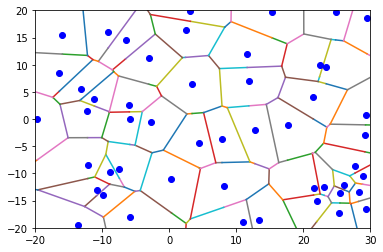

In [1360]:
# UNIFORM 50 Point SAMPLE
fifty = [(7.876095957779622, -3.64312766996769), (27.735646029241146, -8.695147214351785), (21.502933349228996, 4.02373352299611), (-7.442405640834874, -9.092381420971858),
 (0.32777656028260793, -11.068798049669564), (-13.606981528696597, -19.40371938901879), (10.945182701120533, -18.9337443502537), (22.033175577639817, -15.15769321437801),
 (-12.20874768173739, 1.5589577330857551), (28.275774328584234, -13.402288454580855), (25.396649341830816, -17.302294427829796), (26.16945608435914, -12.189232935868208),
 (-8.823688784622878, -9.729374135770223), (29.314999402606347, 0.8364639754871241), (13.419378420847188, -18.504439649884013), (11.884964988017899, 6.935871169687179),
 (-11.190709241542557, 3.733827492520856), (-10.849885960978394, -13.112055541702983), (-9.864642678912027, -14.009273046190135), (-6.515209898536128, 14.514736220261028),
 (12.793139750045754, -1.9742499183739568), (29.53343018818613, 18.53640584807725), (29.390738382645175, -16.48216869993844), (-2.7302305390087156, -0.5373459111010312),
 (-9.106859138267453, 16.057889759838453), (29.219416423031618, -2.965390159990257), (25.49210007584533, -13.56781930283888), (23.445710707712237, 9.638866850459308),
 (8.136664586987305, -12.34313575875369), (-16.425854613635963, 8.429435596268547), (-5.8936804013403545, 0.015625047813280446), (-3.079972357773457, 11.181633952976782),
 (21.557979495862035, -12.687603644939225), (-15.96306493451177, 15.513378238235333), (11.63588231481841, 12.05955865585824), (4.4314785035972655, -4.327605953195635),
 (-19.681781779176365, 0.09087444791735422), (3.1557231093057645, 19.794225616971758), (17.67518146887756, -1.1245743939735604), (22.44666864002005, 9.890852091780516),
 (-5.810567195164333, -18.03058132930285), (15.333155619060065, 19.659338407571056), (-13.149550805277919, 5.601005605133427), (-5.9573809819870025, 2.6393550375664923),
 (23.133477591953124, -12.44159021121586), (28.87045339521979, -10.432159665066427), (2.430650156268978, 16.330798427896937), (24.841308636242303, 19.683044924017985),
 (-12.166171972996302, -8.393619957361423), (3.4033230750452965, 6.470693182378469)]
Voronoi(fifty)

### Testing points that are cocircular and colinear

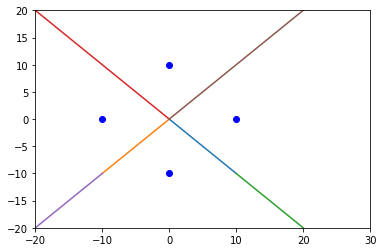

In [1361]:
Voronoi([(0,10), (10,0),(0,-10),  (-10,0)])

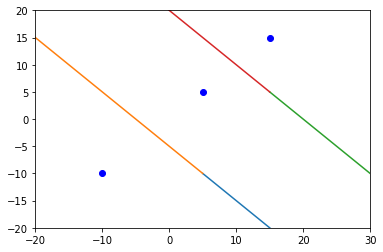

In [1362]:
Voronoi([(-10,-10), (5,5), (15,15)])

### Stress Test Uniform point distribution

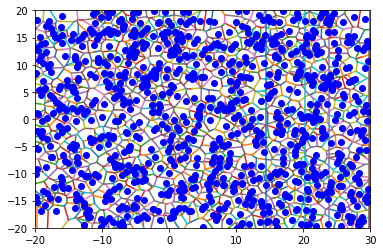

In [1364]:
import random
batc = []
for x in range(905):
    batc.append((random.uniform(-20,30), random.uniform(-20,20)))
Voronoi(batc)